In [1]:
import pandas as pd

df_bag_of_words = pd.read_csv('bag_of_words.csv')
df_bag_of_words.head()

,Unnamed: 0,business_id,cool,date,funny,review_id,stars,text,useful,user_id,text_list,tokens,lemmatized,processed,bag_vector
0,29369,kPR47uxGqmQNIQkIZr2_Tg,0,2016-06-12 04:28:37,0,kJa4M0WsQaGwoMDSP0c-hw,5,Friendly staff and generous portions of great ...,1,sizanx4RIwRC3BfhQv8KOg,"['Friendly', 'staff', 'and', 'generous', 'port...","{'generous', 'staff', 'and', 'food', '!', 'u',...","{'generous', 'food', 'staff', '!', 'and', 'roc...","['generous', 'food', 'staff', 'rock', 'u', 'fr...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,80459,qHQPvp6pZ75fB63kOKUPqg,0,2014-08-13 19:10:43,1,8qst2v9HE8tV7B3IFvtSIA,5,Job well done!! Thank you Rick for making our ...,2,DXP3K7wG_nu9jYPzQ8xVFA,"['Job', 'well', 'done', '!', '!', 'Thank', 'yo...","{'the', 'for', 'and', 'look', 'a', 'our', '.',...","{'the', 'for', 'and', 'look', 'a', 'our', '.',...","['look', 'yearly', 'carpet', 'sure', 'thank', ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,21659,vhIJ91MDgUuk4Cr9Kpj1Nw,0,2012-04-29 10:58:50,0,DYAIyC476YkouqJgXuUv_A,4,I'm a big fan of Jimmy John's. This location i...,1,OTRxfMCtfrbUemIigxCaOg,"['I', ""'m"", 'a', 'big', 'fan', 'of', 'Jimmy', ...","{'and', 'get', 'unfriendly', 'bacon', 'on', 's...","{'and', 'get', 'unfriendly', 'bacon', 'on', 's...","['get', 'unfriendly', 'bacon', 'service', 'loc...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,69369,oH4iqq4kjJfXpHCgB9G1sw,0,2013-11-14 21:10:14,0,vCJS9ok_G3OfuxCtT3UNYg,4,Well Spa was surprisingly posh and I loved it!...,0,d84GXn6uhT1qyDEziAmR8Q,"['Well', 'Spa', 'was', 'surprisingly', 'posh',...","{'the', 'and', 'massage', 'full', 'posh', 'lov...","{'the', 'and', 'massage', 'amenity', 'full', '...","['massage', 'amenity', 'full', 'posh', 'loved'...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,93624,kPR47uxGqmQNIQkIZr2_Tg,0,2015-07-17 22:52:49,0,rMpvc3Hua7qRtDph8_pnpw,5,Wanted to try this place for a while and it di...,0,Ixaz7mLwzGQGg_W2yfBGqg,"['Wanted', 'to', 'try', 'this', 'place', 'for'...","{'for', 'and', 'food', 'banana', 'a', 'orderin...","{'for', 'food', 'banana', 'and', 'dessert', 'a...","['food', 'banana', 'dessert', 'ordering', 'hel...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [2]:
import numpy as np

def to_array(s):
    array = s.rstrip(']').lstrip('[').split(',')
    for value in range(len(array)):
        array[value] = int(array[value])
    return array


    

df_bag_of_words['bag_vector'] = df_bag_of_words['bag_vector'].map(to_array)
df_bag_of_words['bag_vector'][0]

df_vocab = pd.read_csv('vocab_df.csv')
#len(df_vocab)
len(df_bag_of_words['bag_vector'][0])

12263

In [3]:
df_bag_of_words['stars'].value_counts()[5]/len(df_bag_of_words)

0.441685404242839

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

documents = list(df_bag_of_words['text'])
y = list(df_bag_of_words['stars'])

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svd', TruncatedSVD()),
    ('clf', svm.SVR())
])
# You can tune hyperparameters using grid search
params = {
    'tfidf__max_df': (0.75, 1.0),
    'tfidf__ngram_range': ((1,1), (1,2)),
    'svd__n_components': (125, 150, 200),
    'clf__C': (1, 50),
    }
grid_search = GridSearchCV(pipeline, params, scoring='r2',
    n_jobs=-1, verbose=10)
# fit your documents (Should be a list/array of strings)
grid_search.fit(documents, y)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(params.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done  65 out of  72 | elapsed:  9.3min remaining:   59.8s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 10.2min finished
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Best score: 0.533
Best parameters set:
	clf__C: 50
	svd__n_components: 150
	tfidf__max_df: 0.75
	tfidf__ngram_range: (1, 2)


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

documents = list(df_bag_of_words['text'])
y = list(df_bag_of_words['stars'])

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', Lasso())
])
# You can tune hyperparameters using grid search
params = {
    'tfidf__max_df': (0.75, 1.0),
    'tfidf__ngram_range': ((1,1),(1,2)),
    'clf__alpha': (1e-4, 1e-2),
    }
grid_search = GridSearchCV(pipeline, params, scoring='r2',
    n_jobs=-1, verbose=10)
# fit your documents (Should be a list/array of strings)
grid_search.fit(documents, y)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(params.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done  12 out of  24 | elapsed:   44.2s remaining:   44.2s
[Parallel(n_jobs=-1)]: Done  15 out of  24 | elapsed:   50.8s remaining:   30.5s
[Parallel(n_jobs=-1)]: Done  18 out of  24 | elapsed:  1.2min remaining:   23.2s
[Parallel(n_jobs=-1)]: Done  21 out of  24 | elapsed:  2.8min remaining:   24.1s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  3.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  3.2min finished


Best score: 0.612
Best parameters set:
	clf__alpha: 0.0001
	tfidf__max_df: 1.0
	tfidf__ngram_range: (1, 2)


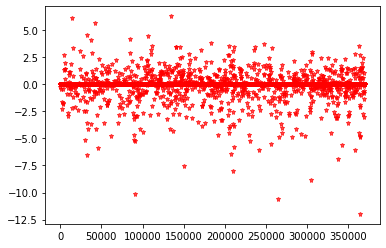

In [15]:
import matplotlib.pyplot as plt
optimal_lasso = grid_search.best_estimator_['clf']
plt.plot(optimal_lasso.coef_,alpha=0.7,linestyle='none',\
         marker='*',markersize=5,color='red',\
         label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
#print(grid_search.best_estimator_['clf'])
plt.show()

In [30]:
#Top coefficients
sorted(abs(optimal_lasso.coef_), reverse = True)

[11.97335443083329,
 10.558509671039928,
 10.160587674211946,
 8.882225884161944,
 7.971978284562313,
 7.543872117727129,
 6.876258207708875,
 6.545382950002201,
 6.415111502703653,
 6.253931502761534,
 6.137831912903159,
 6.1078295508099405,
 6.033638148074336,
 5.868327114715125,
 5.798532732073274,
 5.631968244359702,
 5.599211787874052,
 5.497673879051316,
 5.2958822868804205,
 5.2369567835657245,
 5.161300498323219,
 5.13784675959078,
 4.902501464407647,
 4.893726967903503,
 4.886960140307426,
 4.798354177478318,
 4.7686394067513005,
 4.765989780694058,
 4.713020982289227,
 4.6948980138817715,
 4.674002141177396,
 4.572005609222059,
 4.558422710311401,
 4.548026558751772,
 4.532847627502785,
 4.499870557221481,
 4.472743573667657,
 4.46254118311371,
 4.433524549116939,
 4.3025332834416705,
 4.174305824517859,
 4.145517196252659,
 4.120984271400683,
 4.115748278782167,
 4.115029539463651,
 4.101899866729848,
 4.0913269760516435,
 4.082351118013488,
 4.0055946631830865,
 3.865165015